In [7]:
import sqlalchemy
sqlalchemy.__version__

'1.4.7'

In [11]:
#from tkinter import *
#from tkinter import ttk
#root = Tk()
#frm = ttk.Frame(root, padding=10)
#frm.grid()
#ttk.Label(frm, text="Hello World!").grid(column=0, row=0)
#ttk.Button(frm, text="Quit", command=root.destroy).grid(column=1, row=0)
#root.mainloop()


In [6]:
from sqlalchemy import create_engine
from sqlalchemy.types import Integer, Text, String, DateTime, Float
engine = create_engine('sqlite:///test.db')

In [4]:
import pandas as pd
data = pd.read_csv('Hotel Booking Dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   hotel                           2571 non-null   object
 1   is_canceled                     2571 non-null   int64 
 2   lead_time                       2571 non-null   int64 
 3   arrival_date_year               2571 non-null   int64 
 4   arrival_date_month              2571 non-null   object
 5   arrival_date_day_of_month       2571 non-null   int64 
 6   stays_in_weekend_nights         2571 non-null   int64 
 7   stays_in_week_nights            2571 non-null   int64 
 8   adults                          2571 non-null   int64 
 9   children                        2571 non-null   int64 
 10  babies                          2571 non-null   int64 
 11  meal                            2571 non-null   object
 12  country                         2570 non-null   

In [9]:
data_acids = data.filter(['fixed acidity', 'volatile acidity', 'chlorides', 'sulphates'])
data_acids.head()

,fixed acidity,volatile acidity,chlorides,sulphates
0,7.4,0.70,0.076,0.56
1,7.8,0.88,0.098,0.68
2,7.8,0.76,0.092,0.65
3,11.2,0.28,0.075,0.58
4,7.4,0.70,0.076,0.56


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

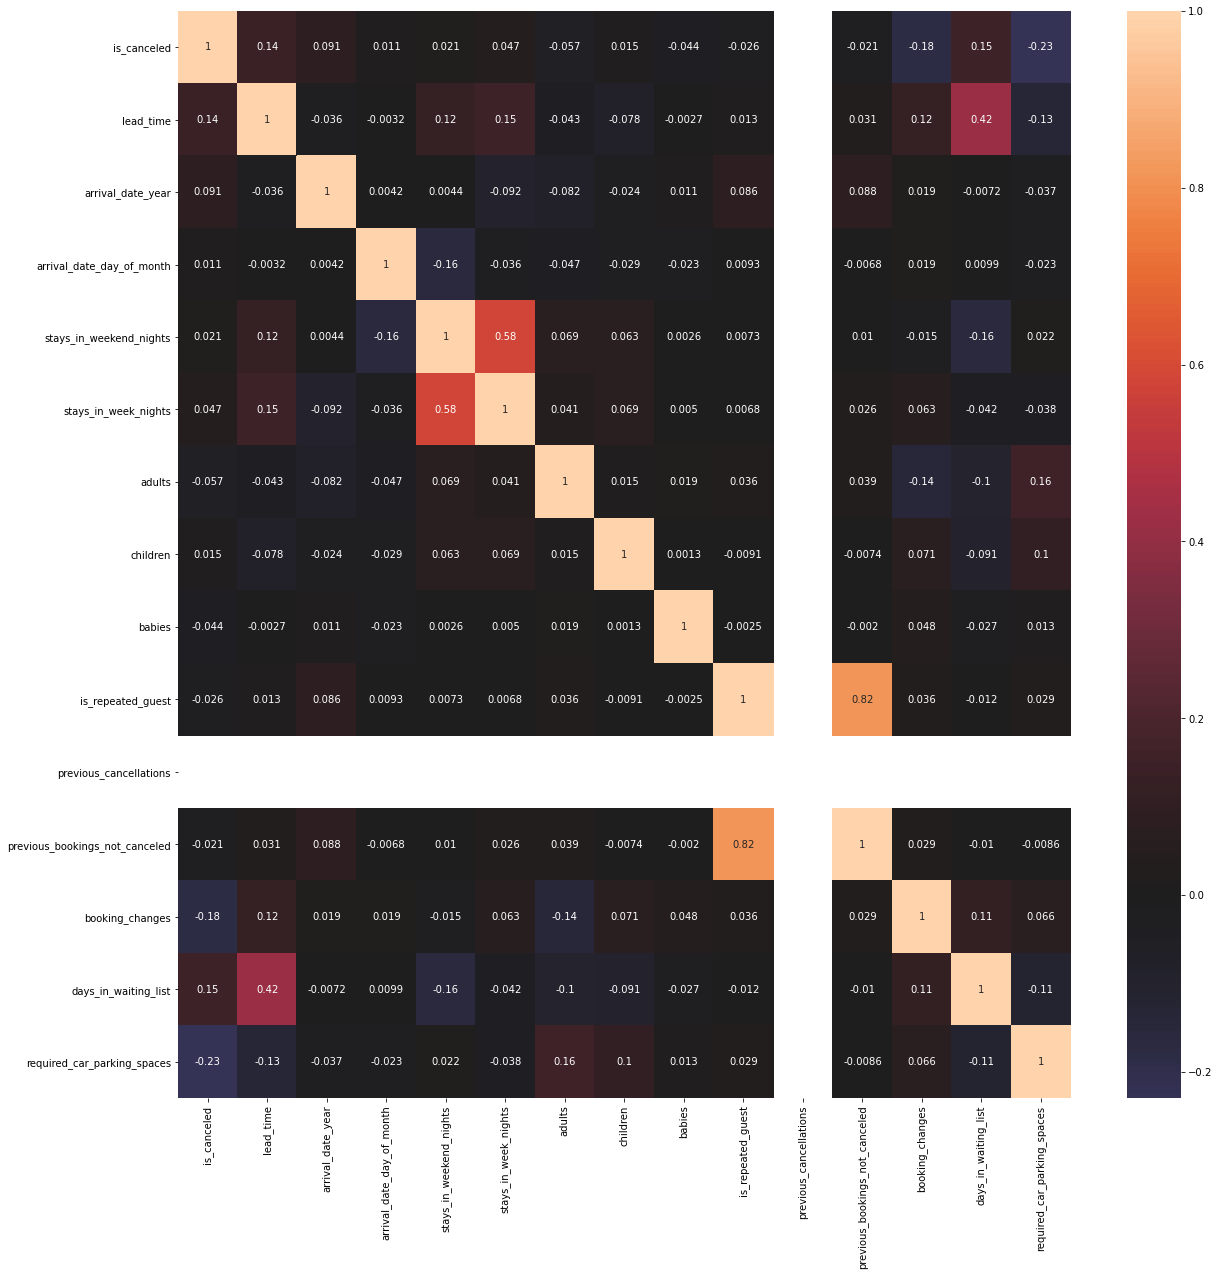

In [9]:
corrmat = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot=True,center=0)

In [10]:
data_acids.to_sql(
    "Acids",
    engine,
    if_exists='replace',
    index=False,
    chunksize=500
    )

In [11]:
table_name = "Wine Data"

data.to_sql(
    table_name,
    engine,
    if_exists='replace',
    index = False,
    chunksize=500,
    dtype={
        "fixed acidity" : Float,
        "volatile acidity" : Float,
        "citric acid" : Float,
        "residual sugar" : Float,
        "chlorides" : Float
    }
)

In [12]:
table_df = pd.read_sql_table(table_name, con=engine)

In [13]:
table_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
